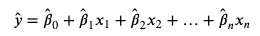

where  𝑛  is the number of predictors,  𝛽0  is the intercept, and  𝑦̂   is the so-called "fitted line" or the predicted value associated with the dependent variable.

**Categorical variables**: they represent categories instead of numerical features

To identify categorical variables: A first thing you can do is use the .describe() and .info() methods. .describe() will give you info on the data types (like strings, integers, etc), but even then continuous variables might have been imported as strings, so it's very important to really have a look at your data. 

__Question:__ How do we choose important variables

- Straight forward selection: try all possible combination with variables and use AIC, BIC etc to choose best.

- Forward selection:

    1. Start with null model
    2. Then one linear model for each separate variables
    3. Pick the variable with lowest RSS
    4. We then add to that model the variable that results variable selection 
    in the lowest RSS for the new two-variable model.
    5. Repeat this until a stoppage criteria is achieved.
- Backward selection

- Mixed Selection

## Transforming categorical variables

When you want to use categorical variables in regression models, they need to be transformed. There are two approaches to this:
- 1) Perform label encoding
- 2) Create dummy variables / one-hot-encoding

**Label encoding**`

1) Put items into a series with --> pd.series(origin)   
2) Assign series a "category" type with --> cat_origin = origin_series.astype('category')

You'll perform label encoding in a way that numerical labels are always between 0 and (number_of_categories)-1.

3) Use scikit-learn 
- from sklearn.preprocessing import LabelEncoder
- lb_make = LabelEncoder()

4) origin_encoded = lb_make.fit_transform(cat_origin)

**Create dummy variables**

The idea is to convert each category into a new column, and assign a 1 or 0 to the column. 

1) pd.get_dummies(cat_origin)

The advantage of using dummies is that, whatever algorithm you'll be using, your numerical values cannot be misinterpreted as being continuous. Going forward, it's important to know that for linear regression (and most other algorithms in scikit-learn), **one-hot encoding is required** when adding categorical variables in a regression model!

**Dummy Variable Trap**

Due to the nature of how dummy variables are created, one variable can be predicted from all of the others. This is known as perfect multicollinearity and it can be a problem for regression. Multicollinearity will be covered in depth later but the basic idea behind perfect multicollinearity is that you can perfectly predict what one variable will be using some combination of the other variables. 

Fortunately, the dummy variable trap can be avoided by simply dropping one of the dummy variables. You can do this by:  
1) Convert columns to dummies and drop first variable: passing ```drop_first=True``` to ```get_dummies()```   
2) remove the original columns from our data and add the dummy columns instead: 
- data = data.drop(['cylinders','model year','origin'], axis=1)  

3) Bring it all together
- data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)

## Multicollinearity

Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. 

One way to see correlation:  
> pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);  
> plt.show()  

One way to see correlation clearly: HEATMAP   
> import seaborn as sns  
> sns.heatmap(data_pred.corr(), center=0)

One way to see correlation:
> data.corr()  
> abs(data.corr()) > 0.75

In [ ]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=ames_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc <1)]

## Log Transformations

When to use: A log transformation is a very useful tool when you have data that clearly does not follow a normal distribution. Log transformation can help reduce skewness when you have skewed data, and can help reducing variability of data. 

**First: model raw data**
    
> from statsmodels.formula.api import ols

> outcome = 'mpg'  
> x_cols = ['displacement', 'horsepower', 'weight', 'acceleration']  
> predictors = '+'.join(x_cols)  
> formula = outcome + '~' + predictors  
> model = ols(formula=formula, data=data).fit()  
> model.summary()  

**Second: Look to see which predictors are non-normal:**
   >  pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12))

**Third: Log Transformation**
>   non_normal = ['displacement', 'horsepower', 'weight']  
    for feat in non_normal:  
        data[feat] = data[feat].map(lambda x: np.log(x))  

OR ANOTHER WAY

> data_log = pd.DataFrame([])  
> data_log['logdisp'] = np.log(data_pred['displacement'])  
> data_log['loghorse'] = np.log(data_pred['horsepower'])  
> data_log['logweight'] = np.log(data_pred['weight'])  
> data_log.hist(figsize  = [6, 6]);  

> pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

**Fourth: Model after log transformation**
    
> outcome = 'mpg'  
> x_cols = ['displacement', 'horsepower', 'weight', 'acceleration']  
> predictors = '+'.join(x_cols)  
> formula = outcome + '~' + predictors  
> model = ols(formula=formula, data=data).fit()  
> model.summary()  

**Outcome: increased our  𝑅2  value of the model!**

## Feature Scaling and Normalization

Why this matters: Often, your dataset will contain features that vary largely in magnitudes. If you leave these magnitudes unchanged, coefficient sizes will fluctuate largely in magnitude as well. This can give the false impression that some variables are less important than others.

## Why do we need to use feature scaling?

- In order to compare the magnitude of coefficients thus increasing the interpretability of coefficients.
- It helps handling disparities in units.
- Some models use euclidean distance in their computations.
- Some models require features to be on equivalent scales.
- In the machine learning space, it helps improve the performance of the model and reducing the values/models from varying widely.
- Some algorithms are sensitive to the scale of the data.

Good rule of thumb: check your features for normality, and while you're at it, scale your features so they have similar magnitudes, even for a "simple" model like linear regression.

### Min-max scaling

When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This way of scaling brings all values between 0 and 1. 


### Standardization

When 

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!



### Mean normalization
When performing mean normalization, you use the following formula:
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

The distribution will have values between -1 and 1, and a mean of 0.



### Unit vector transformation
 When performing unit vector transformations, you can create a new variable x' with a range [0,1]:
 
$$x'= \dfrac{x}{{||x||}}$$


Recall that the norm of x $||x||= \sqrt{(x_1^2+x_2^2+...+x_n^2)}$

### Examples:

In [ ]:
acc = data_pred['acceleration']
logdisp = data_log['logdisp']
loghorse = data_log['loghorse']
logweight = data_log['logweight']

scaled_acc = (acc - min(acc)) / (max(acc) - min(acc))
scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
scaled_weight = (logweight - np.mean(logweight)) / np.sqrt(np.var(logweight))
scaled_horse = (loghorse - np.mean(loghorse)) / (max(loghorse) - min(loghorse))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['acc'] = scaled_acc
data_cont_scaled['disp'] = scaled_disp
data_cont_scaled['horse'] = scaled_horse
data_cont_scaled['weight'] = scaled_weight

data_cont_scaled.hist(figsize = [6, 6]);

## Limit variables

In [ ]:
cat_data = ames.loc[:, ((ames.dtypes != 'object') & (ames.nunique() > 20))]

## Look at histograms

In [ ]:
fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=3, figsize=(16,40))

categoricals = [column for column in cat_data.columns if column != 'Id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(ames[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()